<a href="https://colab.research.google.com/github/VilarimLucas/k-means/blob/main/miniprojeto_01_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install geopandas contextily



O projeto requer que implemente uma aplicação em Python para realizar uma análise de K-means, focada na densidade populacional dos estados brasileiros.



1.   Importar as bibliotecas necessárias:

In [27]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
# Dados fictícios para densidade populacional por estado (habitantes/km²)
estados = ['SP', 'RJ', 'MG', 'ES', 'RS', 'SC', 'PR', 'BA', 'PE', 'CE']
densidade_populacional = [300, 400, 250, 180, 200, 150, 180, 120, 170, 160]

In [29]:
# Converter para um array numpy
X = np.array(densidade_populacional).reshape(-1, 1)

# Definir o número de clusters (exemplo com 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Prever os clusters
clusters = kmeans.predict(X)

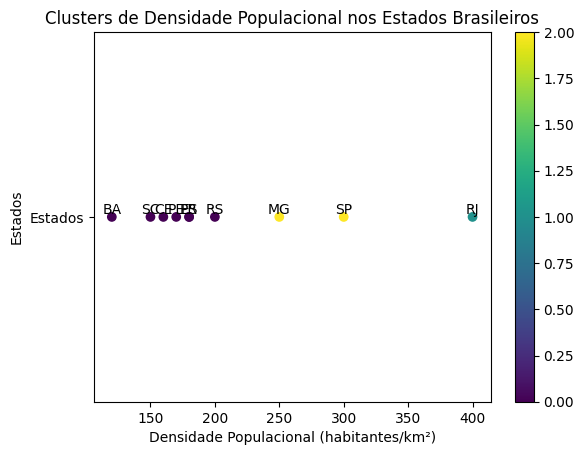

In [30]:
# Visualizar os resultados
plt.scatter(densidade_populacional, [1]*len(densidade_populacional), c=clusters, cmap='viridis')
plt.title('Clusters de Densidade Populacional nos Estados Brasileiros')
plt.xlabel('Densidade Populacional (habitantes/km²)')
plt.ylabel('Estados')
plt.yticks([1], ['Estados'])
for i, estado in enumerate(estados):
    plt.text(densidade_populacional[i], 1, estado, ha='center', va='bottom')
plt.colorbar()
plt.show()